In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Q1 :

In [2]:
data=pd.read_csv("invest.txt", " ")
data.head() #display the five first columns


,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## Q2 :

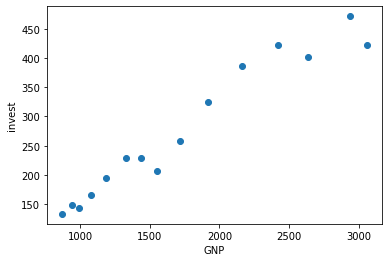

In [3]:
gnp=data["gnp"]
invest=data["invest"]
plt.plot(gnp,invest,"o")
plt.xlabel("GNP")
plt.ylabel("invest")
plt.show()


In [4]:
log_gnp=np.asarray(np.log(data["gnp"]))
log_invest=np.asarray(np.log(data["invest"]))


## Q3 :

In [5]:
#beta_1 computes the beta 1 estimator (beta 1 hat)
def beta_1(X,Y): 
    
    n=len(X)
    denominateur=0
    numerateur=0
    x_bar=np.mean(X)#x_bar is the mean of the data X
    y_bar=np.mean(Y)#y_bar is the mean of the data Y
    res=np.sum((X-x_bar)*(Y-y_bar))/np.sum((X-x_bar)**2) 
    return res

beta_1(log_gnp,log_invest)

1.015281401598871

In [6]:
#beta_0 computes the beta 0 estimator (beta 0 hat)
def beta_0(X,Y):
    x_bar=np.mean(X)#x_bar is the mean of the data X
    y_bar=np.mean(Y)#y_bar is the mean of the data Y
    return y_bar-(beta_1(X,Y)*x_bar)
beta_0(log_gnp,log_invest)

-1.9635913352301815

In [7]:
#sigma_square computes the unbiased estimator for sigma square (sigma is the standard deviation)
def sigma_square(X,Y):
    n=len(X)
    res=1/(n-2)*np.sum((Y-(beta_0(X,Y)+beta_1(X,Y)*X))**2)#computation of the unbiased estimator
    
    return res

sigma_square(log_gnp,log_invest)

0.0076763385554603995

In [8]:
#returns the list of beta 0 and beta 1 standard deviations
def standard_deviation(X,Y):
    s=sigma_square(X,Y)
    n=len(X)
    x_bar=np.mean(X)#x_bar is the mean of the data X
    #computes the standard deviation of the beta 0 hat estimator
    dev_0=np.sqrt(s*(1/n+(x_bar**2/np.sum((X-x_bar)**2))))
    #computes the standard deviation of the beta 1 hat estimator
    dev_1=np.sqrt(s/np.sum((X-x_bar)**2))
    return dev_0,dev_1

standard_deviation(log_gnp,log_invest)
    

(0.4095472716623081, 0.05538306035485281)

In [9]:
Y_estimate=beta_0(log_gnp,log_invest)+beta_1(log_gnp,log_invest)*log_gnp
(log_invest-Y_estimate)**2

array([0.00038776, 0.00021737, 0.00505296, 0.00012562, 0.00251682,
       0.01014053, 0.00027454, 0.02748651, 0.00216995, 0.00489072,
       0.01536568, 0.01026143, 0.00125903, 0.00014642, 0.01949705])

In [10]:
#Computes the determination coefficient
def determination_coeff(X,Y):
    y_bar=np.mean(Y)
    Y_estimate=beta_0(X,Y)+beta_1(X,Y)*X
    return 1-np.sum((Y-Y_estimate)**2)/np.sum((Y-y_bar)**2)
print(determination_coeff(log_gnp,log_invest))

0.9627572956057855


In [11]:
print("Intercept:",beta_0(log_gnp,log_invest))
print("Slope:",beta_1(log_gnp,log_invest))   
print("Standard deviation Intercept:", standard_deviation(log_gnp,log_invest)[0])
print("Standard deviation Slope:",standard_deviation(log_gnp,log_invest)[1])
print("Determination coefficient:",determination_coeff(log_gnp,log_invest))  

Intercept: -1.9635913352301815
Slope: 1.015281401598871
Standard deviation Intercept: 0.4095472716623081
Standard deviation Slope: 0.05538306035485281
Determination coefficient: 0.9627572956057855


In [12]:
#Compute the p-Value
def test_1(X,Y):
    n=len(X)
    alpha=0.9999999999999
    #Endpoints of the range that contains alpha percent of the distribution
    stats.t.interval(alpha,df=n-2, loc=0, scale=1)[1]
    #Student-t test at the level 1-(alpha/2)
    while abs(beta_1(X,Y)/standard_deviation(X,Y)[1])< stats.t.interval(alpha,df=n-2, loc=0, scale=1)[1] :
        alpha-=0.0000000000001
    return 1-alpha
print("p-value:",test_1(log_gnp,log_invest)      )  
        

p-value: 1.1373535446779215e-10


## Q5 :


In [15]:
log_prediction = beta_0(log_gnp,log_invest) + beta_1(log_gnp,log_invest) * np.log(1000)
prediction = np.exp(log_prediction)

print("Necessary investment : ", prediction)

Necessary investment :  155.97942793105494


In [16]:
n=len(log_gnp)
gnpm=np.mean(log_gnp)
quantile = stats.t.interval(0.9,df=n-2, loc=0, scale=1)[1]
sigma = np.sqrt(sigma_square(log_gnp,log_invest))
coef = 1/n + ((np.log(1000) - gnpm)**2)/np.sum((log_gnp - gnpm)**2)
c = np.sqrt(coef)
p = np.sqrt(1+coef)

CI = [0,0]
PI = [0,0]

for i in range(2):
    CI[i] = np.exp(log_prediction + 2*(i-0.5)*quantile*sigma*c)
    PI[i] = np.exp(log_prediction + 2*(i-0.5)*quantile*sigma*p)

print(CI)
print(PI)

[146.67552673421952, 165.8734928682758]
[132.00238933412936, 184.31167845087424]


## Q6 :

In [17]:
Ci = [[],[]]
Pi = [[],[]]

n=len(log_gnp)

gnp = [log_gnp.min() + k/n * (log_gnp.max()-log_gnp.min()) for k in range(n)]

#Compute the confident and predictive interval

for i in range(n):
    coef = 1/n + ((gnp[i] - gnpm)**2)/np.sum((log_gnp - gnpm)**2)
    c = np.sqrt(coef)
    p = np.sqrt(1+coef)
    prediction = beta_0(log_gnp,log_invest) + beta_1(log_gnp,log_invest) * gnp[i]
    for j in range(2):
        Ci[j].append(prediction + 2*(j-0.5)*quantile*sigma*c)
        Pi[j].append(prediction + 2*(j-0.5)*quantile*sigma*p)



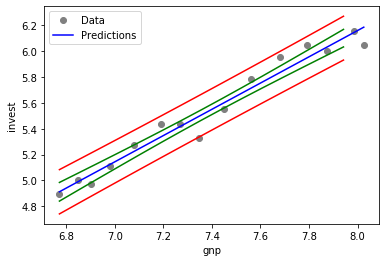

In [18]:
Y_pred = beta_0(log_gnp,log_invest) + beta_1(log_gnp,log_invest)* log_gnp
plt.plot(log_gnp, log_invest, 'o', label = "Data",color="grey")

plt.plot(log_gnp, Y_pred, label = "Predictions",color="blue")
plt.plot(gnp, Ci[0], color = "green")
plt.plot(gnp, Ci[1], color = "green")
plt.plot(gnp, Pi[0], color = "red")
plt.plot(gnp, Pi[1], color = "red")

plt.xlabel("gnp")
plt.ylabel("invest")
plt.legend()
plt.show()

## Q7 :

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X = log_gnp.reshape(-1, 1)
Y = log_invest
linearReg = LinearRegression().fit(X,Y)

print("slope : ",linearReg.coef_[0])
print("Intercept", linearReg.intercept_)
print("Coef of determination :", linearReg.score(X,Y))
print("Prediction for GNP = 1000 : ", np.exp(linearReg.predict([[np.log(1000)]]))[0])

slope :  1.015281401598871
Intercept -1.9635913352301815
Coef of determination : 0.9627572956057855
Prediction for GNP = 1000 :  155.97942793105494


## Q8:


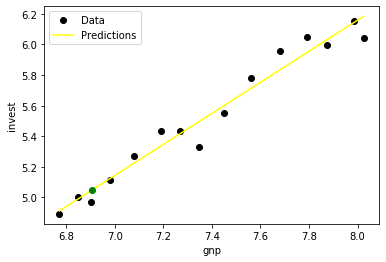

In [21]:
#Result plotted
Y= linearReg.intercept_ + linearReg.coef_[0]*log_gnp

plt.plot(log_gnp, log_invest, 'o', label = "Data",color="black")
plt.plot(log_gnp, Y, label = "Predictions",color="yellow")
plt.plot([np.log(1000)], linearReg.predict([[np.log(1000)]]), 'o',color="green")
plt.xlabel("gnp")
plt.ylabel("invest")
plt.legend()
plt.show()

## Q9:

In [22]:
#Compute Gram Matrix
X = np.array([[1, log_gnp[i], data["interest"][i]] for i in range(len(log_gnp))])
Gram = np.dot(np.transpose(X),X)/n
XtX = np.dot(np.transpose(X),X)

print(Gram)

print("Rank is : ", np.linalg.matrix_rank(Gram))

[[ 1.          7.38352141  7.45266667]
 [ 7.38352141 54.68323179 55.94590287]
 [ 7.45266667 55.94590287 62.92371333]]
Rank is :  3


## Q10 :

In [23]:
#Compute the coefficient
theta_head = np.dot(np.linalg.inv(XtX), np.dot(np.transpose(X),log_invest))


#Compute the sandard deviation and determination coef
pred = np.dot(X,theta_head)
print (pred)
n=len(log_invest)
sigma2 = np.sum( (log_invest - pred)**2 )/(n - 3)
C = sigma2 * np.linalg.inv(XtX)

deviations = np.sqrt(np.array([C[0,0],C[1,1], C[2,2]]))
R2 = np.sum((pred - np.mean(log_invest))**2)/np.sum((log_invest - np.mean(log_invest))**2)

#Compute p-values
values = theta_head/deviations
p_values = 2 * (1 - stats.t.cdf(np.abs(values), n-3))


[4.90528557 4.98236582 5.03472347 5.12797763 5.23113153 5.33616949
 5.40923708 5.5006366  5.61425505 5.73044573 5.84403409 5.9422537
 6.02220069 6.12650243 6.18419057]


In [24]:
#Results
Title = ["Intercept :", "GNP coefficient :", "Interest coefficient :"]

print("Determination coefficient :", R2)
print("\n")

for i in range(3):
    print(Title[i])
    print("Estimated value :", theta_head[i])
    print("Standart variation :", deviations[i])
    print("Statistic test :", values[i])
    print("p_value :", p_values[i])
    print("\n")



Determination coefficient : 0.9633108306728322


Intercept :
Estimated value : -2.180454725911659
Standart variation : 0.6623991977963691
Statistic test : -3.291753270785152
p_value : 0.0064383670509304824


GNP coefficient :
Estimated value : 1.0512426913199278
Standart variation : 0.10206137806192313
Statistic test : 10.30010285263945
p_value : 2.5995168484449493e-07


Interest coefficient :
Estimated value : -0.0065288794060975874
Standart variation : 0.015344205065604202
Statistic test : -0.42549479612553015
p_value : 0.6780071418825142




## Q11:

In [25]:
n=len(log_gnp)
x=np.array([1,np.log(1000),10])
log_pred=np.dot(x,theta_head)
print("Predicted value for GNP = 1000 and interest= 10 (Investemnent) :", np.exp(log_pred))
print("Predicted value for GNP = 1000 and interest= 10 (log Investemnent) :", log_pred)
quantile = stats.t.ppf(0.99,df=n-3, loc=0, scale=1)

coef = np.dot(np.dot(np.transpose(x),np.linalg.inv(XtX)),x)
c = np.sqrt(sigma2 *coef)
p = np.sqrt(sigma2 *(1+coef))

CI = [0,0]
PI = [0,0]

for i in range(2):
    CI[i] = log_pred + 2*(i-0.5)*quantile*c
    PI[i] = log_pred + 2*(i-0.5)*quantile*p

print("Confidence interval:",CI)
print("Predictive Interval:",PI)

Predicted value for GNP = 1000 and interest= 10 (Investemnent) : 150.80441472106742
Predicted value for GNP = 1000 and interest= 10 (log Investemnent) : 5.015983730483985
Confidence interval: [4.782642617249268, 5.249324843718702]
Predictive Interval: [4.6793337088663876, 5.352633752101582]


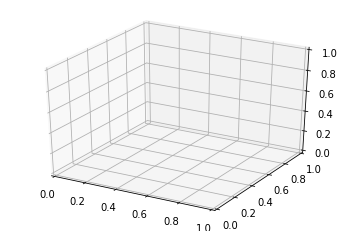

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## Q12 :

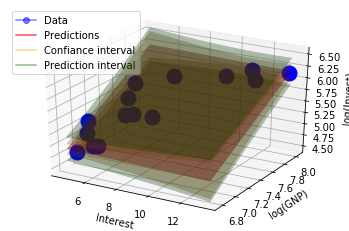

In [50]:
Pred = []
Cmin = []
Cmax = []
Pmin = []
Pmax = []

gnps = [log_gnp.min() + k/100 * (log_gnp.max()-log_gnp.min()) for k in range(101)]
interests = [data.interest.min() + k/100 * (data.interest.max()-data.interest.min()) for k in range(101)]

gnps, interests = np.meshgrid(gnps,interests)

for i in range(101):
    Pred.append([])
    Cmin.append([])
    Cmax.append([])
    Pmin.append([])
    Pmax.append([])
    for j in range(101):
        x = np.array([1, gnps[i,j], interests[i,j]])
        coef = np.dot(np.dot(x,np.linalg.inv(XtX)),x)
        c = np.sqrt(coef)
        p = np.sqrt(1+coef)
        
        pred = np.dot(x,theta_head)
        Pred[i].append(pred)
        Cmin[i].append(pred - quantile*sigma*c)
        Cmax[i].append(pred + quantile*sigma*c)
        Pmin[i].append(pred - quantile*sigma*p)
        Pmax[i].append(pred + quantile*sigma*p)
        
        



# Display the data
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(interests, gnps, np.array(Pred),alpha=0.4, color = "red")
ax.plot_surface(interests, gnps, np.array(Cinf),alpha=0.3, color = "orange")
ax.plot_surface(interests, gnps, np.array(Csup),alpha=0.3, color = "orange")
ax.plot_surface(interests, gnps, np.array(Pinf),alpha=0.3, color = "green")
ax.plot_surface(interests, gnps, np.array(Psup),alpha=0.3, color = "green")


ax.plot(data["interest"], log_gnp, log_invest, 'o', marker = 'o', markersize = 15, color = "blue")


ax.set_xlabel('Interest')
ax.set_ylabel('log(GNP)')
ax.set_zlabel('log(Invest)')





plt.show()

## Q13 :

In [72]:
X = np.array([[log_gnp[i], data["interest"][i]] for i in range(len(log_gnp))])
Y = log_invest
linearReg = LinearRegression().fit(X,Y)

print("Slopes for GNP = 1000 and interest= 10 : ",linearReg.coef_)
print("Intercept for GNP = 1000 and interest= 10 :", linearReg.intercept_)
print("Coef of determination for GNP = 1000 and interest= 10 :", linearReg.score(X,Y))
print("Prediction for GNP = 1000 and interest= 10 : ", np.exp(linearReg.predict([[np.log(1000), 10]]))[0])

Slopes for GNP = 1000 and invest= 10 :  [ 1.05124269 -0.00652888]
Intercept for GNP = 1000 and invest= 10 : -2.1804547259113995
Coef of determination for GNP = 1000 and invest= 10 : 0.9633108306726245
Prediction for GNP = 1000 and invest= 10 :  150.80441472087105
